<a href="https://colab.research.google.com/github/Raihanyodisya/Restaurant-Revenue-Prediction/blob/main/Checkpoint_(2)_Data_Understanding_Raihan_Yodisya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALISIS PENJUALAN RESTORAN**

#**Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns

**Library untuk Splitting Data**

In [2]:
from sklearn.model_selection import train_test_split

**Library untuk Normalisasi Data**

In [3]:
from sklearn.preprocessing import MinMaxScaler

**Library Untuk Build Model**

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Analisis dataset tentang penjualan restoran ini adalah untuk memahami faktor-faktor apa yang mempengaruhi kinerja penjualan restoran. Analisis ini penting bagi pemilik restoran untuk mengidentifikasi peluang-peluang untuk meningkatkan pendapatan, meningkatkan efisiensi operasional, dan meningkatkan pengalaman pelanggan.

##**Assess Situation**

Untuk menilai situasi penjualan restoran, kita harus melihat beberapa faktor yang relevan. Ini termasuk jumlah pelanggan yang datang, harga rata-rata menu, biaya pemasaran, jenis masakan yang ditawarkan, rata-rata pengeluaran pelanggan, promosi yang tersedia, jumlah ulasan, dan pendapatan bulanan restoran. Dengan menjawab pertanyaan-pertanyaan ini, kita bisa mendapatkan gambaran yang lebih jelas tentang kinerja penjualan restoran dan faktor-faktor apa yang berpengaruh.

##**Data Mining Goals**

1. Pengambilan Keputusan yang Lebih Baik: Informasi yang diperoleh dari dataset dapat membantu pemilik restoran dalam mengambil keputusan yang lebih baik dalam hal strategi pemasaran, pengelolaan inventaris, pengembangan menu, dan layanan pelanggan untuk meningkatkan kinerja penjualan mereka.

2. Identifikasi Pola dan Tren: Dengan menganalisis dataset, dapat diidentifikasi pola dan tren dalam kinerja penjualan restoran dari waktu ke waktu. Hal ini membantu dalam memahami bagaimana faktor-faktor tertentu dapat memengaruhi pendapatan bulanan dan jumlah pelanggan.

3. Optimalisasi Pengeluaran Pemasaran: Dengan menganalisis efektivitas pengeluaran pemasaran terhadap kinerja penjualan, pemilik restoran dapat mengidentifikasi cara-cara untuk mengoptimalkan anggaran pemasaran mereka sehingga mendapatkan hasil yang maksimal.

4. Pemahaman Mendalam: Dataset ini memberikan pemahaman yang lebih dalam tentang berbagai aspek penjualan restoran, seperti jumlah pelanggan, harga menu, pengeluaran pemasaran, jenis masakan, pengeluaran pelanggan, promosi, ulasan, dan pendapatan bulanan.

##**Project Plan**

Rencana proyek ini mencakup tahapan-tahapan analisis yang komprehensif untuk memahami penjualan restoran. Ini meliputi pemahaman data, analisis deskriptif, penelusuran korelasi antar variabel, segmentasi pelanggan, prediksi pendapatan, evaluasi efektivitas promosi, penyusunan laporan, serta presentasi dan pembahasan implementasi rekomendasi. Setiap tahap dirancang untuk memberikan wawasan yang mendalam tentang faktor-faktor yang mempengaruhi kinerja penjualan restoran, dengan tujuan akhir untuk meningkatkan pendapatan dan kepuasan pelanggan.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Jelaskan darimana sumber data kalian di sini, sertakan linknya juga ya

In [33]:
df = pd.read_csv("https://raw.githubusercontent.com/Raihanyodisya/Restaurant-Revenue-Prediction/main/Data%20Cleaning.csv")
df.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121


##**Describe Data**

####Informasi Dasar

In [ ]:
jumlah_baris = df.shape[0]
jumlah_kolom = df.shape[1]
print("jumlah_baris", jumlah_baris)
print("jumlah_kolom", jumlah_kolom)

jumlah_baris 1000
jumlah_kolom 8


Pada dataset penjualan restoran ini, terdapat 1000 baris dan 8 kolom

####Informasi Lanjutan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


Pada dataset penjualan restoran yang terdiri dari 1000 baris dan 8 kolom. Dibawah ini adalah penjelasan untuk setiap kolom:

1. **Number_of_Customers**: Jumlah pelanggan yang mengunjungi restoran.

2. **Menu_Price**: Harga rata-rata dari menu restoran.

3. **Marketing_Spend**: Total pengeluaran untuk kegiatan pemasaran.

4. **Cuisine_Type**: Jenis masakan yang ditawarkan oleh restoran (kolom bertipe objek).

5. **Average_Customer_Spending**: Rata-rata pengeluaran per pelanggan.

6. **Promotions**: Jumlah promosi yang dilakukan oleh restoran.

7. **Reviews**: Jumlah ulasan atau review yang diterima restoran.

8. **Monthly_Revenue**: Pendapatan bulanan dari restoran.

Tipe data dari masing-masing kolom adalah sebagai berikut:


*   Kolom 1, 2, 3, 5, dan 7: float64 (data numerik)
*   Kolom 4: object (data string atau kategori)
*   Kolom 6: int64 (data numerik dalam format bilangan bulat)

####Informasi Statistik Deskriptif

In [ ]:
df.describe()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.271000,30.219120,9.958726,29.477085,0.497000,49.837000,268.724172
std,26.364914,11.278760,5.845586,11.471686,0.500241,29.226334,103.982950
min,10.000000,10.009501,0.003768,10.037177,0.000000,0.000000,-28.977809
25%,30.000000,20.396828,4.690724,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,39.553220,1.000000,76.000000,343.395793
max,99.000000,49.974140,19.994276,49.900725,1.000000,99.000000,563.381332


1. **Number_of_Customers**:

Mean: 53.271

std: 26.364914

Min: 10

25%: 30

50%: 54

75%: 74

Max: 99

Penjelasan: Kolom ini menunjukkan jumlah pelanggan yang mengunjungi restoran dalam periode waktu tertentu. Rata-rata jumlah pelanggan adalah sekitar 53, dengan standar deviasi sekitar 26. Nilai minimum adalah 10 dan nilai maksimum adalah 99.

2. **Menu_Price**:

Mean: 30.219120

Std: 11.278760

Min: 10.009501

25%: 20.396828

Median: 30.860614

75%: 39.843868

Max: 49.974140

Penjelasan: Ini adalah harga rata-rata dari menu yang ditawarkan oleh restoran. Harga menu berkisar antara sekitar 10 hingga hampir 50, dengan rata-rata sekitar 30.

3. **Marketing_Spend**:

Mean: 9.958726

Std: 5.845586

Min: 0.003768

25%: 4.690724

Median: 10.092047

75%: 14.992436

Max: 19.994276

Penjelasan: Ini adalah total pengeluaran untuk kegiatan pemasaran oleh restoran. Rata-rata pengeluaran pemasaran sekitar 10, dengan standar deviasi sekitar 5.8.

4. **Average_Customer_Spending**:

Mean: 29.477085

Std: 11.471686

Min: 10.037177

25%: 19.603041

Median: 29.251365

75%: 39.553220

Max: 49.900725

Penjelasan: Ini adalah rata-rata pengeluaran per pelanggan di restoran. Rata-rata pengeluaran per pelanggan adalah sekitar 29, dengan standar deviasi sekitar 11.

5. **Promotions**:

Mean: 0.497000

Std: 0.500241

Min: 0.000000

25%: 0.000000

Median: 0.000000

75%: 1.000000

Max: 1.000000

Penjelasan: Ini adalah jumlah promosi yang dilakukan oleh restoran. Sebagian besar (75%) dari data memiliki nilai 0, artinya mayoritas restoran tidak melakukan promosi.

6. **Reviews**:

Mean: 49.837000

Std: 29.226334

Min: 0.000000

25%: 24.000000

Median: 50.000000

75%: 76.000000

Max: 99.000000

Penjelasan: Ini adalah jumlah ulasan atau review yang diterima restoran. Rata-rata jumlah ulasan adalah sekitar 50, dengan standar deviasi sekitar 29.

7. **Monthly_Revenue**:

Mean: 268.724172

Std: 103.982950

Min: -28.977809

25%: 197.103642

Median: 270.213964

75%: 343.395793

Max: 563.381332

Penjelasan: Ini adalah pendapatan bulanan dari restoran. Pendapatan bulanan rata-rata sekitar 268, dengan standar deviasi sekitar 103. Salah satu nilai minimum adalah negatif, mungkin perlu diteliti lebih lanjut.


##**Exploratory Data Analysis**

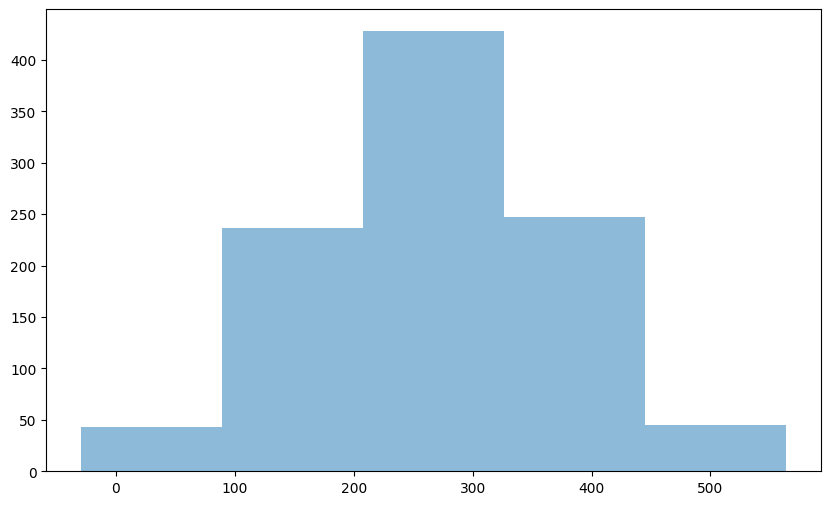

In [ ]:
#Menggambarkan Pendapatan Bulanan dengan Bar Plot
fig = plt.figure(figsize =(10, 6))
plt.hist(df["Monthly_Revenue"],bins=5,alpha=0.5)
plt.show()

Pada visual atau gambar di atas berupa Histogram / Bar Plot. Histogram sendiri merupakan salah satu metode visualisasi yang berguna untuk menampilkan distribusi frekuensi data. Dalam hal ini, histogram digunakan untuk menunjukkan distribusi pendapatan bulanan restoran (Monthly Revenue) ke dalam lima interval (bins) yang diatur oleh parameter bins=5. Dengan demikian, kita dapat melihat sebaran pendapatan bulanan restoran dalam rentang nilai tertentu.

<ipython-input-17-2d41ad65ff13>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cuisine_Type', y='Average_Customer_Spending', data=df, notch=True,palette="husl")


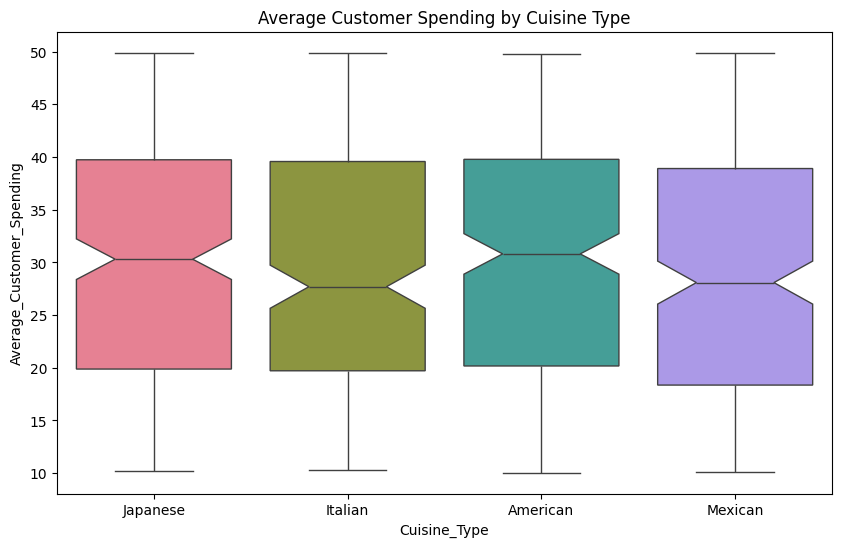

In [ ]:
#Menggambarkan Pengeluaran Pelanggan berdasarkan Jenis Masakan dengan Box Plot
plt.figure(figsize=(10,6))
sns.boxplot(x='Cuisine_Type', y='Average_Customer_Spending', data=df, notch=True,palette="husl")
plt.title('Average Customer Spending by Cuisine Type')
plt.show()

Pada visual atau gambar di atas berupa Box Plot. Box plot sendiri merupakan salah satu metode visualisasi yang berguna untuk menampilkan distribusi data, serta menggambarkan sejumlah statistik deskriptif seperti nilai median, kuartil, dan outlier. Dalam hal ini, box plot digunakan untuk membandingkan rata-rata pengeluaran pelanggan berdasarkan jenis masakan (Cuisine Type), sehingga kita dapat melihat perbedaan distribusi pengeluaran pelanggan antar jenis masakan dengan lebih jelas.

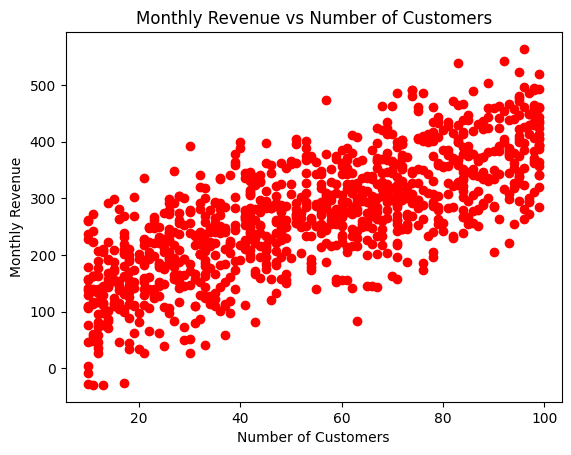

In [ ]:
#Menggambarkan perbandingan Pendapatan Bulanan dengan Jumlah Pelanggan menggunakan Scatter Plot
plt.scatter(df["Number_of_Customers"], df["Monthly_Revenue"], color='red')
plt.xlabel("Number of Customers")
plt.ylabel("Monthly Revenue")
plt.title("Monthly Revenue vs Number of Customers")
plt.show()

Pada gambar atau visual di atas berupa scatter plot yang bertujuan untuk membandingkan pendapatan bulanan dengan jumlah pelanggan. Scatter plot sendiri merupakan salah satu metode visualisasi yang berguna untuk menampilkan hubungan antara dua variabel numerik. Dalam hal ini, scatter plot digunakan untuk menunjukkan hubungan antara Pendapatan Bulanan dan Jumlah Pelanggan. Setiap titik pada plot mewakili satu observasi dalam data, di mana posisi titik menunjukkan nilai Jumlah Pelanggan dan Pendapatan Bulanan untuk observasi tersebut. Dengan memvisualisasikan data dalam bentuk scatter plot, kita dapat melihat pola atau tren yang mungkin ada di antara dua variabel tersebut.







In [ ]:
#Grouping the data by 'Cuisine_Type' and calculating the average 'Monthly_Revenue' for each type.
df.groupby("Cuisine_Type")["Monthly_Revenue"].agg("mean")

Cuisine_Type
American    269.604825
Italian     263.699862
Japanese    271.700186
Mexican     269.366082
Name: Monthly_Revenue, dtype: float64

In [ ]:
#Heatmap to visualize the correlation matrix of the dataset.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Cuisine_Type"] = le.fit_transform(df["Cuisine_Type"])
df["Rest_Quality"] = le.fit_transform(df["Rest_Quality"])

#First way of doing heatmap
corr=df.corr().round(2)
corr.style.background_gradient(cmap ='coolwarm')

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,Rest_Quality
Number_of_Customers,1.000000,0.030000,-0.010000,-0.000000,-0.010000,0.060000,-0.010000,0.750000,-0.340000
Menu_Price,0.030000,1.000000,0.020000,0.010000,0.020000,0.020000,0.000000,0.260000,-0.100000
Marketing_Spend,-0.010000,0.020000,1.000000,-0.040000,-0.060000,-0.040000,-0.030000,0.270000,-0.140000
Cuisine_Type,-0.000000,0.010000,-0.040000,1.000000,-0.030000,-0.000000,-0.030000,0.010000,0.030000
Average_Customer_Spending,-0.010000,0.020000,-0.060000,-0.030000,1.000000,0.010000,0.050000,-0.040000,-0.000000
Promotions,0.060000,0.020000,-0.040000,-0.000000,0.010000,1.000000,-0.020000,0.010000,0.010000
Reviews,-0.010000,0.000000,-0.030000,-0.030000,0.050000,-0.020000,1.000000,-0.020000,-0.030000
Monthly_Revenue,0.750000,0.260000,0.270000,0.010000,-0.040000,0.010000,-0.020000,1.000000,-0.450000
Rest_Quality,-0.340000,-0.100000,-0.140000,0.030000,-0.000000,0.010000,-0.030000,-0.450000,1.000000


Dengan menggunakan heatmap, kita dapat dengan mudah melihat pola korelasi antar variabel dalam dataset. Warna yang lebih cerah menunjukkan korelasi yang lebih kuat, sedangkan warna yang lebih gelap menunjukkan korelasi yang lebih lemah atau tidak ada korelasi sama sekali.

<Axes: >

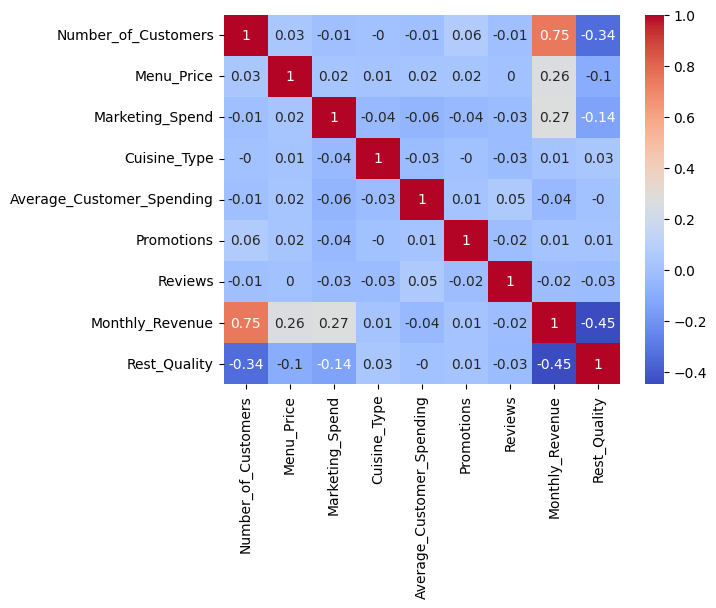

In [ ]:
#Second way of doing heatmap
sns.heatmap(corr, cmap ='coolwarm', annot = True)

##**Verify Data Quality**

####Missing Values

In [ ]:
missing_values = df.isnull().sum()
print (missing_values)

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
Rest_Quality                 0
dtype: int64


Pada dataset penjualan restoran ini tidak terdapat *Missing Values* pada setiap kolomnya.

####Outliers Values

In [ ]:
fig = px.box(df, y='Monthly_Revenue', title='Box Plot of Monthly Revenue')
fig.update_layout(xaxis_title='Monthly Revenue')
fig.show()

Pada *Outliers Values* yang terlihat pada di atas pendapatan bulanan restoran sebesar 563.3813 dan yang berada di angka -28.97781 merupakan sebuah anomali dari semua data yang ada pada dataset.

####Duplicated Values

In [ ]:
print("Total Duplication: ", df.duplicated().sum())

Total Duplication:  0


Pada dataset penjualan restoran ini tidak terdapat *Duplicated Values* pada datasetnya.

####Inconsistent Values / Noise (Optional)

In [ ]:
#Tambahkan kode untuk mengecek apakah ada nilai inkosisten/noise pada tiap kolom di dataset kalian ya (OPSIONAL)

Jangan lupa juga untuk berikan penjelasan di sini (OPSIONAL)

##**Data Cleaning**

Missing Value

In [ ]:
missing_values = df.isnull().sum()
print (missing_values)

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64


Pada dataset penjualan restoran ini tidak terdapat *Missing Values* pada setiap kolomnya.

In [ ]:
print("Total Duplication: ", df.duplicated().sum())

Total Duplication:  0


Pada dataset penjualan restoran ini tidak terdapat *Duplicated Values* pada datasetnya.

Outliers

In [ ]:
results = []

cols = df.select_dtypes(include=['int64','float64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Number_of_Customers,0.0
Menu_Price,0.0
Marketing_Spend,0.0
Average_Customer_Spending,0.0
Promotions,0.0
Reviews,0.0
Monthly_Revenue,0.5


Disini terdapat *Outliers* pada kolom *Monthly_Revenue* sebanyak 0.5. Untuk menghilangkan *Outliers* tersebut kita akan menggunakan perintah dibawah ini.

In [ ]:
Q1 = df['Monthly_Revenue'].quantile(0.25)
Q3 = df['Monthly_Revenue'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['Monthly_Revenue']=np.where(df['Monthly_Revenue']>upper_whisker,upper_whisker,np.where(df['Monthly_Revenue']<lower_whisker,lower_whisker,df['Monthly_Revenue']))

Di atas ini merupakan cara yang dapat kita lakukan untuk menghilangkan *Outliers* yang ada pada salah satu kolom yaitu kolom *Monthly_Revenue*.

In [ ]:
results = []

cols = df.select_dtypes(include=['int64','float64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Number_of_Customers,0.0
Menu_Price,0.0
Marketing_Spend,0.0
Average_Customer_Spending,0.0
Promotions,0.0
Reviews,0.0
Monthly_Revenue,0.0


Disini dapat dilihat bahwa *Outliers* yang sebelumnya ada pada kolom *Monthly_Revenue* sudah menjadi 0.0, dapat disimpulkan bahwa *Outliers* yang ada pada kolom tersebut sudah tidak ada.

##**Construct Data**

In [ ]:
df['customers_spending'] = df['Number_of_Customers'] * df['Average_Customer_Spending']
df['marketing to revenue'] = df['Marketing_Spend'] / df['Monthly_Revenue']
df['revenue to price'] = df['Monthly_Revenue'] / df['Menu_Price']
df['revenue to spending'] = df['Monthly_Revenue'] / df['Average_Customer_Spending']
df['customers to price'] = df['Number_of_Customers'] * df['Menu_Price']
df['price to revenue'] = df['Menu_Price'] / df['Monthly_Revenue']

In [ ]:
df.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,customers_spending,marketing to revenue,revenue to price,revenue to spending,customers to price,price to revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040,2210.404084,0.036088,8.138481,9.684037,2630.175765,0.122873
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091,430.861498,0.020685,5.530202,12.327995,960.481848,0.180825
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763,1830.634043,0.014250,7.777947,14.447951,3400.500304,0.128569
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573,1328.886832,0.012683,8.096456,18.341171,3010.371495,0.123511
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121,382.984281,0.018783,10.598477,14.492171,523.685984,0.094353


Perintah di atas membuat beberapa kolom baru dalam data restoran untuk membantu dalam menganalisis beberapa hubungan antara data yang sudah ada. Contohnya seperti, **price to revenue**: Ini membagi harga menu dengan pendapatan bulanan. Ini memberikan gambaran tentang seberapa besar harga menu dalam kaitannya dengan pendapatan bulanan Dan masih banyak yang lainnya seperti yang ada pada gambar di atas.

##**Data Reduction**

In [ ]:
df.drop(['Promotions'], axis=1,inplace=True)
df.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Reviews,Monthly_Revenue,customers_spending,marketing to revenue,revenue to price,revenue to spending,customers to price,price to revenue
0,61,43.117635,12.663793,Japanese,36.236133,45,350.912040,2210.404084,0.036088,8.138481,9.684037,2630.175765,0.122873
1,24,40.020077,4.577892,Italian,17.952562,36,221.319091,430.861498,0.020685,5.530202,12.327995,960.481848,0.180825
2,81,41.981485,4.652911,Japanese,22.600420,91,326.529763,1830.634043,0.014250,7.777947,14.447951,3400.500304,0.128569
3,70,43.005307,4.416053,Italian,18.984098,59,348.190573,1328.886832,0.012683,8.096456,18.341171,3010.371495,0.123511
4,30,17.456199,3.475052,Italian,12.766143,30,185.009121,382.984281,0.018783,10.598477,14.492171,523.685984,0.094353


Disini kolom *Promotions* dihilangkan karena sebagian besar dari restoran tidak melakukan promosi.

##**Data Transformation**

In [34]:
type_ = {
    'Italian': 1,
    'Japanese': 2,
    'Mexican': 3,
    'American' : 4
}

df['Cuisine_Type'] = df['Cuisine_Type'].map(type_)

In [35]:
df

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,2,36.236133,0,45,350.912040
1,24,40.020077,4.577892,1,17.952562,0,36,221.319091
2,81,41.981485,4.652911,2,22.600420,1,91,326.529763
3,70,43.005307,4.416053,1,18.984098,1,59,348.190573
4,30,17.456199,3.475052,1,12.766143,1,30,185.009121
...,...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,2,19.033585,1,40,249.312034
996,31,20.615496,5.822885,3,17.040990,0,57,110.228767
997,69,17.110656,4.141898,2,44.649315,0,55,312.212552
998,73,37.664722,3.046556,2,27.767358,0,23,272.482204


In [37]:
file = "Data_Cleaned_Fix.csv"
df.to_csv(file,index=False)

#**Inisiasi Variabel untuk menyimpan Dataframe**

In [38]:
df = pd.read_csv('Data_Cleaned_Fix.csv')

In [39]:
df.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,2,36.236133,0,45,350.912040
1,24,40.020077,4.577892,1,17.952562,0,36,221.319091
2,81,41.981485,4.652911,2,22.600420,1,91,326.529763
3,70,43.005307,4.416053,1,18.984098,1,59,348.190573
4,30,17.456199,3.475052,1,12.766143,1,30,185.009121


In [40]:
df

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,2,36.236133,0,45,350.912040
1,24,40.020077,4.577892,1,17.952562,0,36,221.319091
2,81,41.981485,4.652911,2,22.600420,1,91,326.529763
3,70,43.005307,4.416053,1,18.984098,1,59,348.190573
4,30,17.456199,3.475052,1,12.766143,1,30,185.009121
...,...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,2,19.033585,1,40,249.312034
996,31,20.615496,5.822885,3,17.040990,0,57,110.228767
997,69,17.110656,4.141898,2,44.649315,0,55,312.212552
998,73,37.664722,3.046556,2,27.767358,0,23,272.482204


##**Select Modelling Techniques**

Berdasarkan Business Understanding, analisis ini lebih cocok untuk pendekatan prediktif.

Pendekatan prediktif akan membantu pemilik restoran dalam mengambil keputusan yang lebih baik dengan menggunakan informasi yang diperoleh dari dataset untuk memprediksi kinerja penjualan restoran di masa depan. Dengan menggunakan teknik prediksi, pemilik restoran dapat mengidentifikasi peluang-peluang untuk meningkatkan pendapatan, meningkatkan efisiensi operasional, dan meningkatkan pengalaman pelanggan.

###**Pre-Processing**

**Split Data**

In [41]:
x = df.drop('Cuisine_Type', axis=1)
y = df['Cuisine_Type']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

**Normalisasi Data**

In [42]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test)

In [13]:
df['Cuisine_Type'] = df['Cuisine_Type'].fillna(df['Cuisine_Type'].mode()[0])

###**Build and Train Model**

**Gaussian Naive Bayes**

In [43]:
gnb = GaussianNB()

gnb.fit(x_train_norm, y_train)

GaussianNB()

**K-Nearest Neighbor**

In [44]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

**Decision Tree**

In [45]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

###**Begins and Compare Predict**

In [46]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

In [47]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

In [48]:
combined_data.sample(10)

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,Cuisine_Type,gnb_prediction,knn_prediction,dtc_prediction
257,64,13.717166,12.686795,15.256495,1,21,305.950121,2,3,2,4
140,82,25.152863,7.847874,42.335795,0,21,415.499979,2,4,1,4
289,10,22.901119,13.337333,25.235615,1,73,107.749705,1,4,2,1
15,35,40.193513,13.502801,17.500178,0,45,240.832816,3,2,4,1
228,79,10.049467,16.884974,17.282525,1,91,362.812960,2,2,2,4
80,73,41.271613,10.621707,37.831799,1,69,319.672243,2,4,4,4
61,11,32.620334,5.061169,33.761979,1,87,-28.977809,4,4,4,3
57,33,37.319283,13.081516,23.222440,0,1,318.773209,3,4,3,2
184,35,19.409423,0.440538,25.690682,0,56,133.503574,1,3,3,2
231,49,12.985193,16.595262,41.108700,1,17,229.953120,1,1,2,1


#**Evaluation**

##**Evaluate Results**

###**Klasifikasi**

Gaussian Naive Bayes

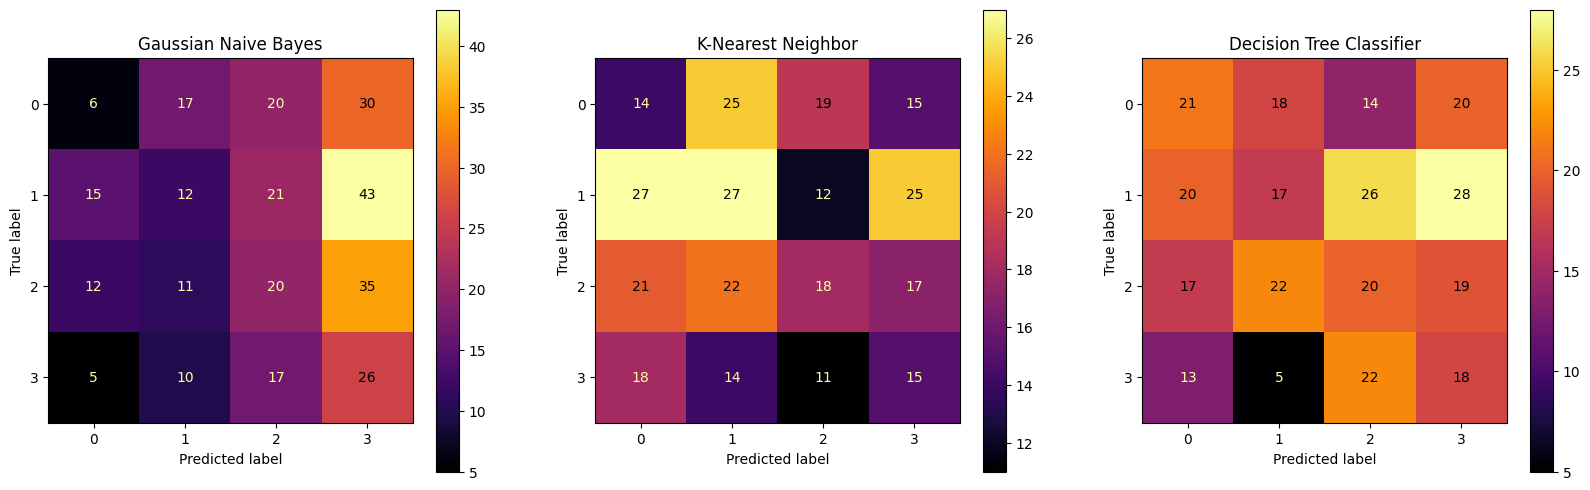

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

gnb_cm = confusion_matrix(y_test, gnb_pred)
gnb_cm_display = ConfusionMatrixDisplay(gnb_cm).plot(ax=axes[0], cmap='inferno')
gnb_cm_display.ax_.set_title("Gaussian Naive Bayes")

knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm_display = ConfusionMatrixDisplay(knn_cm).plot(ax=axes[1], cmap='inferno')
knn_cm_display.ax_.set_title("K-Nearest Neighbor")

dtc_cm = confusion_matrix(y_test, dtc_pred)
dtc_cm_display = ConfusionMatrixDisplay(dtc_cm).plot(ax=axes[2], cmap='inferno')
dtc_cm_display.ax_.set_title("Decision Tree Classifier")

plt.show()

##**Review Process**

###**Cross Validation**

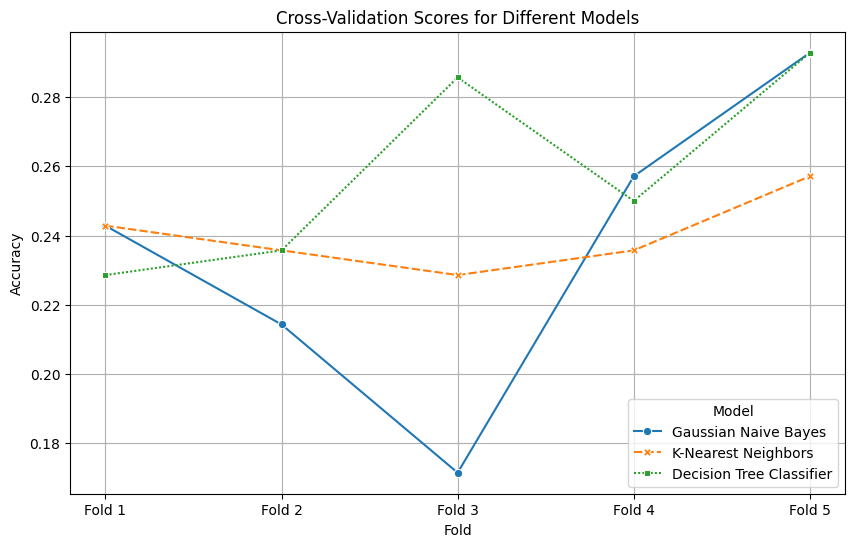

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Inisialisasi model
models = [gnb, knn, dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

# Lakukan validasi silang untuk setiap model
cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train_norm, y_train, cv=5)
    cv_scores.append(scores)

# Buat dataframe dari hasil validasi silang
df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T

# Tampilkan visualisasi hasil validasi silang dengan lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()

###**Feature Selection**

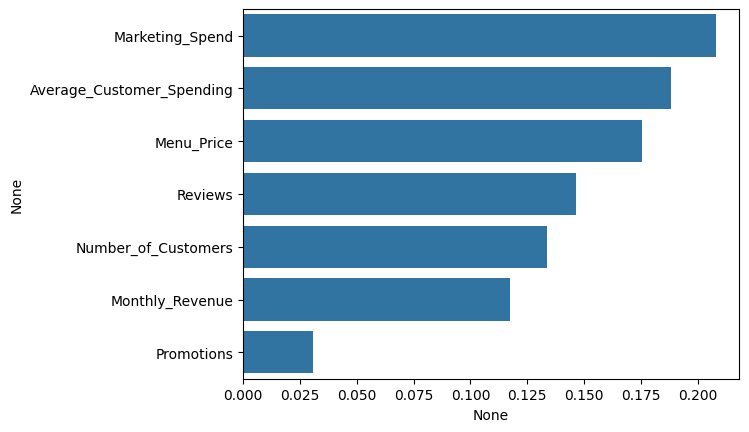

In [54]:
feature_imp = pd.Series(dtc.feature_importances_, index=x.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.show()

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik:", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = gnb.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)

Parameter terbaik: {'var_smoothing': 1.0}
Akurasi sebelum tuning: 0.21333333333333335
Akurasi setelah tuning: 0.19666666666666666
